In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [56]:
df = pd.read_csv('auto-mpg.csv')

In [57]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [59]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [60]:
df['horsepower'].values

array(['130', '165', '150', '150', '140', '198', '220', '215', '225',
       '190', '170', '160', '150', '225', '95', '95', '97', '85', '88',
       '46', '87', '90', '95', '113', '90', '215', '200', '210', '193',
       '88', '90', '95', '?', '100', '105', '100', '88', '100', '165',
       '175', '153', '150', '180', '170', '175', '110', '72', '100', '88',
       '86', '90', '70', '76', '65', '69', '60', '70', '95', '80', '54',
       '90', '86', '165', '175', '150', '153', '150', '208', '155', '160',
       '190', '97', '150', '130', '140', '150', '112', '76', '87', '69',
       '86', '92', '97', '80', '88', '175', '150', '145', '137', '150',
       '198', '150', '158', '150', '215', '225', '175', '105', '100',
       '100', '88', '95', '46', '150', '167', '170', '180', '100', '88',
       '72', '94', '90', '85', '107', '90', '145', '230', '49', '75',
       '91', '112', '150', '110', '122', '180', '95', '?', '100', '100',
       '67', '80', '65', '75', '100', '110', '105', '140', '1

In [61]:
df = df.replace('?', np.nan)
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [62]:
df['horsepower'].values

array(['130', '165', '150', '150', '140', '198', '220', '215', '225',
       '190', '170', '160', '150', '225', '95', '95', '97', '85', '88',
       '46', '87', '90', '95', '113', '90', '215', '200', '210', '193',
       '88', '90', '95', nan, '100', '105', '100', '88', '100', '165',
       '175', '153', '150', '180', '170', '175', '110', '72', '100', '88',
       '86', '90', '70', '76', '65', '69', '60', '70', '95', '80', '54',
       '90', '86', '165', '175', '150', '153', '150', '208', '155', '160',
       '190', '97', '150', '130', '140', '150', '112', '76', '87', '69',
       '86', '92', '97', '80', '88', '175', '150', '145', '137', '150',
       '198', '150', '158', '150', '215', '225', '175', '105', '100',
       '100', '88', '95', '46', '150', '167', '170', '180', '100', '88',
       '72', '94', '90', '85', '107', '90', '145', '230', '49', '75',
       '91', '112', '150', '110', '122', '180', '95', nan, '100', '100',
       '67', '80', '65', '75', '100', '110', '105', '140', '1

In [63]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [64]:
df['horsepower'] = df['horsepower'].astype(float)

In [65]:
df.shape

(398, 9)

<Axes: xlabel='mpg', ylabel='Count'>

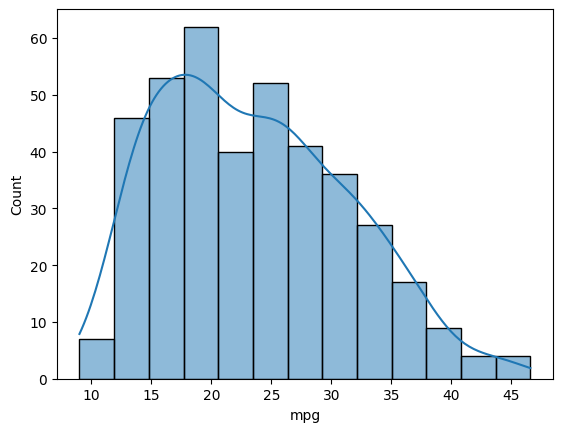

In [66]:
sns.histplot(df['mpg'],kde=True)

Most cars in the dataset get 15–25 MPG.
Few cars have extremely high or extremely low MPG.
Distribution is somewhat right-skewed (long tail on high MPG side).


<Axes: xlabel='acceleration', ylabel='Count'>

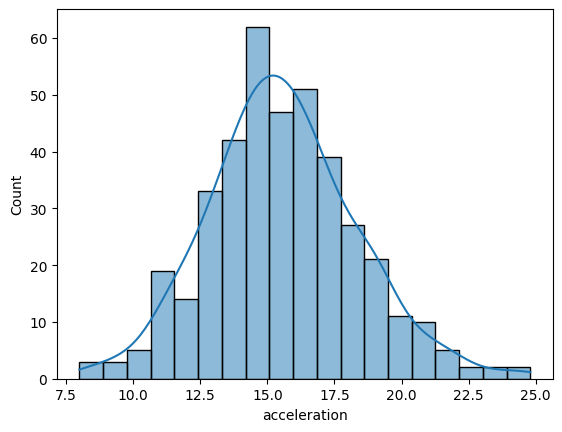

In [67]:
sns.histplot(df['acceleration'],kde=True)

acceleration data looks like a clean normal distribution.
Most cars take around 14–16 seconds to accelerate.
Only a few cars are either very slow or very fast.

Text(0.5, 1.0, 'Horsepower vs mpg')

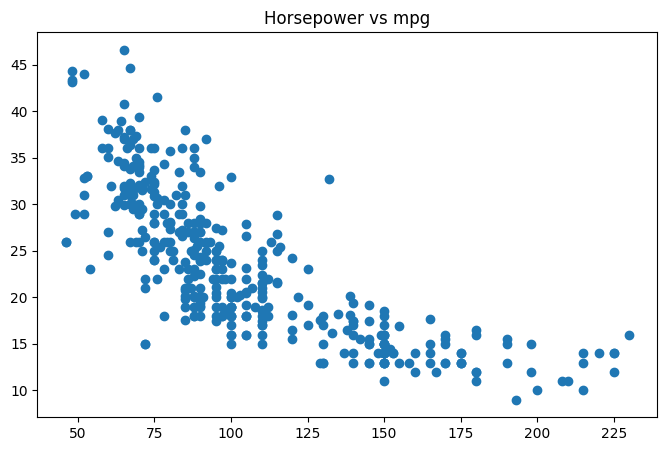

In [68]:
#scatter plot

plt.figure(figsize=(8,5))
plt.scatter(df['horsepower'],df['mpg'])
plt.title('Horsepower vs mpg')
#

Higher horsepower = lower fuel efficiency.
Cars with powerful engines burn more fuel.


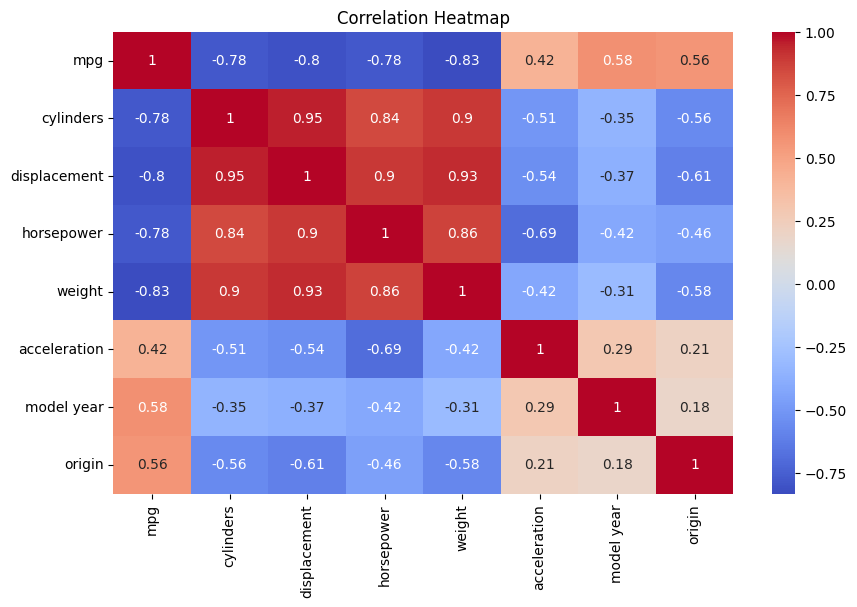

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


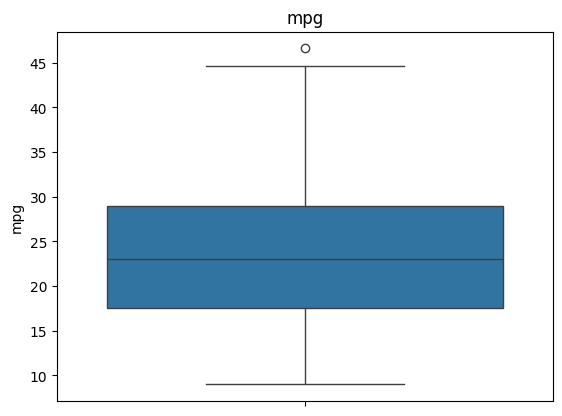

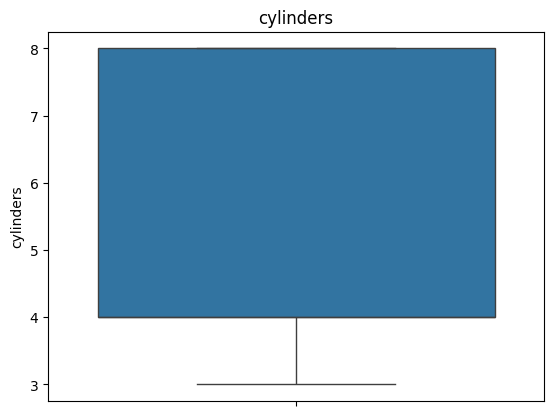

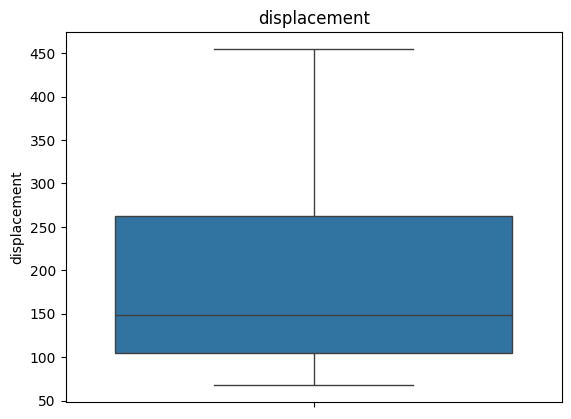

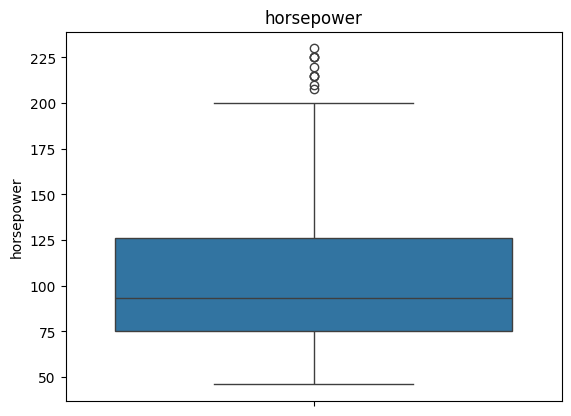

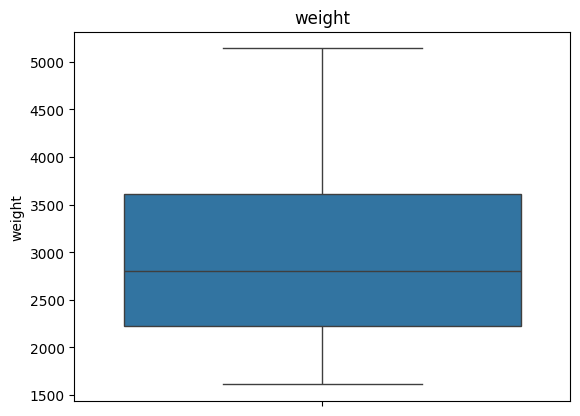

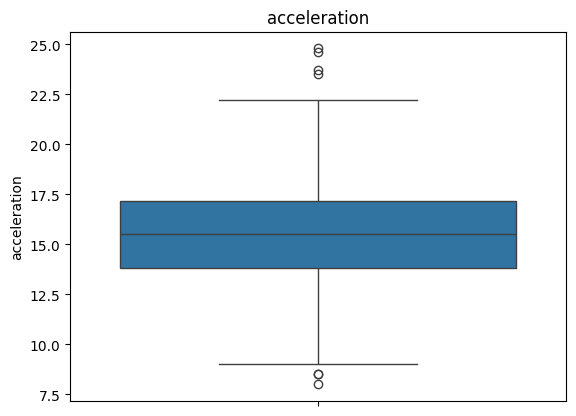

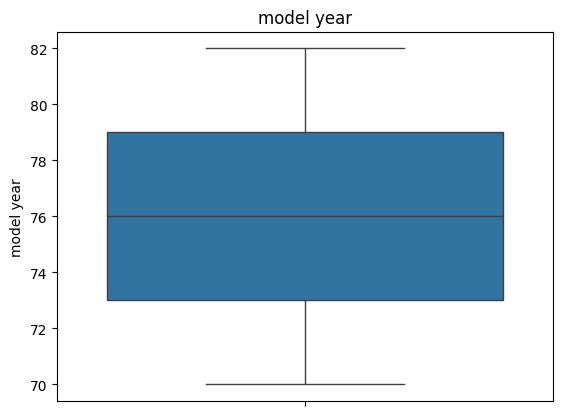

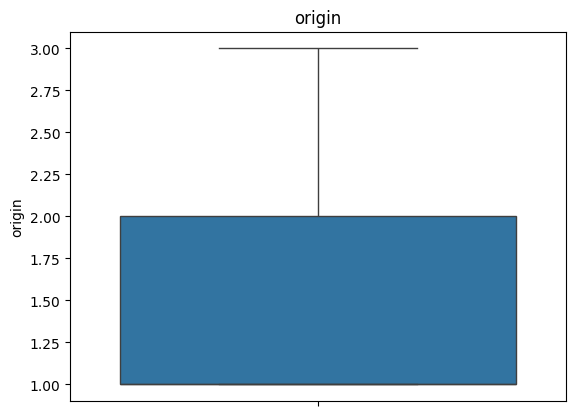

In [70]:
#find outlier
for i in df.columns[:-1]:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [71]:
cols = ['horsepower', 'acceleration']

df_clean = df.copy()

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Instead of filtering inside loop, just store bounds
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]


In [72]:
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Original shape: (398, 9)
Cleaned shape: (376, 9)


In [74]:
df_clean.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [75]:
X = df_clean[['cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin']]

y = df_clean['mpg']


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [80]:

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [81]:

print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R² Score: 0.8091388147072877
MAE: 3.030481900640919
MSE: 13.792719365335678


In [93]:
import pandas as pd

new_car = pd.DataFrame({
    'cylinders':[8],
    'displacement':[350],
    'horsepower':[165],
    'weight':[3693],
    'acceleration':[11.5],
    'model year':[70],
    'origin':[1]
})

pred = model.predict(new_car)
pred

array([13.13807586])

#XGBOOST

In [82]:
X1 = df_clean[['cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin']]

y1 = df_clean['mpg']


 
X1_train, X_1test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)


In [84]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xg_model.fit(X1_train, y1_train)

 

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [85]:
y_pred_xg = xg_model.predict(X_test)


In [86]:

print("R² Score:", r2_score(y_test, y_pred_xg))
print("MAE:", mean_absolute_error(y_test, y_pred_xg))
print("MSE:", mean_squared_error(y_test, y_pred_xg))

R² Score: 0.886112882133712
MAE: 2.1719236398998056
MSE: 8.230133610705375


In [92]:
import pandas as pd

new_car = pd.DataFrame({
    'cylinders':[8],
    'displacement':[350],
    'horsepower':[165],
    'weight':[3693],
    'acceleration':[11.5],
    'model year':[70],
    'origin':[1]
})

xg_model.predict(new_car)


array([14.690742], dtype=float32)

In [96]:
import pickle

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xg_model, f)
